# PRIMER ENTREGA - PROYECTO FINAL - AGOSTINA FONTANA

RESUMEN EJECUTIVO

Para la selección del dataset exploramos la siguiente página: https://www.kaggle.com/datasets

Quería indagar sobre el mercado inmobiliario en Argentina. 

La apertura de la línea de crédito para la obtención de créditos hipotecarios a baja tasa de interés en el Banco Nación Argentina reactivó el mercado inmobiliario, aumentando el nivel de demanda de propiedades principalmente a aquellos que no poseemos vivienda propia y nos encontramos alquilando.

Por tal motivo busqué un dataset que este vinculado al mercado inmobiliario en Argentina https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset

El objetivo del análisis consistirá en evaluar las características de las propiedades que se encuentran disponibles en el mercado buscando un equilibrio entre el precio de la propiedad, los atruibutos y el presupuesto que uno posee y también, haciendo una comparativa entre la compra y continuar pagando un alquiler.

CARACTERISTICAS DEL DATASET

En las 25 columnas que tiene el Dataset contamos con información de georeferenciación de la propiedad, cantidad de ambientes, superficie total y superficie cubierta, tipo de propiedad, precio de la propiedad, operación (venta o alquiler),descripción, etc. lo cual nos va permitir efectuar el análisis mencionado.

La misma posee información de todo el país, pero para este proyecto, acotaremos el análisis a Bs.As. G.B.A. Zona Norte.

HIPÓTESIS

1) Costo de Compra vs alquiler
"El costo mensual equivalente a comprar una propiedad (cuota crédito hipotecario) es menor o comparable al costo mensual de alquilar una propiedad similar en la misma zona"

2) La localidad de Martinez en el partido de San Isidro presenta un valor por metro2 significativamente más alto que otras zonas periericas, lo que indicaría que mudarse a zonas mas alejadas podría representar un ahorro o una propiedad con mayor cantidad de m2.




IMPORTACION DEL DATASET A LA NOTEBOOK
El dataset al ser de Kaggle puedo descargarlo en mi computadora o conectarlo directamente a la WEB. 
Vamos a avanzar con esta segunda opción. 

In [340]:
import kagglehub as kh
import pandas as pd

In [341]:
# Descargo el dataset seleccionado
path = kh.dataset_download("alejandroczernikier/properati-argentina-dataset")

# Verifico la ruta descargada

print ('Ruta del dataset',path)


Ruta del dataset C:\Users\afontan1\.cache\kagglehub\datasets\alejandroczernikier\properati-argentina-dataset\versions\1


In [342]:
# Valido si dentro de la carpeta tengo archivos y si se encuentra con extensión CSV. La librería os me va a permitir interactuar con el sistema operativo y validar si el archivo existe
import os
Archivos_CSV= [f for f in os.listdir(path) if f.endswith('.csv')]
print ('Archivos CSV Encontrados',Archivos_CSV)

Archivos CSV Encontrados ['entrenamiento.csv']


In [343]:
# Defino el Data Frame leyendo el CSV que se encuentra en la ruta del data set obtenida en el paso anterior
df= pd.read_csv('C:/Users/afontan1/.cache/kagglehub/datasets/alejandroczernikier/properati-argentina-dataset/versions/1/entrenamiento.csv')


In [344]:
# Utilizo la función head() para mostrar las primeras 5 filas del Dataframe (df) importado permitiendo una visualización rápida de los datos

df.head()

# Como me indica que tengo 25 columnas y con head() me muestra solo 20 voy a utilizar una formula para que nos las limite

pd.set_option('display.max_columns',None)

df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,2.0,NaN,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,NaN,NaN,2.0,1.0,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,3.0,2.0,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [345]:
# Voy a ver la cantidad de registros que tiene mi df

df.shape

(992192, 25)

MANIPULACIÓN DE DATOS
Una vez que cargue mi archivo CSV y visualice las columnas y la cantidad de filas voy a realizar las siguientes transformaciones: 
* Selección de COLUMNAS: Cumpliendo con el requisito de la consigna de mantener al menos 15 columnas, voy a quitar aquellas que no me generan valor por no ser analizables en mi modelo o por ser de texto libre. 
* Selección de FILAS: Nos quedaremos solo con aquellas propiedades que se encuentren ubicadas en el norte de Gran Buenos Aires. 

In [346]:
# Como son mas las columnas a dejar que a quitar, no selecciono columnas sino que elimino las columnas que no voy a utilizar a través de la función DROP

df=df.drop(['l4','l5','l6','title','description'],axis=1)


In [347]:
print ('Nuevo Data Set con columnas ajustadas')

df.shape

Nuevo Data Set con columnas ajustadas


(992192, 20)

In [348]:
#Primeros 5 registros
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,3.0,2.0,2.0,NaN,NaN,USD,NaN,Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,3.0,2.0,2.0,77.0,67.0,USD,NaN,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,60.0,55.0,USD,NaN,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,74.0,47.0,USD,NaN,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,3.0,2.0,1.0,66.0,64.0,USD,NaN,Departamento,Venta,173000.0


In [349]:
# Últimos 5 registros
df.tail()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
992187,999996,Propiedad,2020-01-09,2020-04-27,2020-01-09,-57.575169,-38.042062,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,5.0,NaN,NaN,USD,NaN,Casa,Venta,190000.0
992188,999997,Propiedad,2020-01-09,2020-04-27,2020-01-09,-68.860929,-32.953935,Argentina,Mendoza,Cuadro Benegas,NaN,NaN,5.0,NaN,NaN,USD,NaN,Casa,Venta,520000.0
992189,999998,Propiedad,2020-01-09,2020-04-27,2020-01-09,-57.963191,-34.920051,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,5.0,NaN,NaN,ARS,NaN,Departamento,Alquiler,12000.0
992190,999999,Propiedad,2020-01-09,2020-04-28,2020-01-09,-57.549815,-38.020436,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,5.0,NaN,NaN,USD,NaN,Casa,Venta,550000.0
992191,1000000,Propiedad,2020-01-09,2020-04-28,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,NaN,5.0,NaN,NaN,ARS,NaN,Otro,Venta,800000.0


In [350]:
#Para reducir las filas no voy a seleccionar filas sino voy a realizar un filtro y voy a generar un nuevo dataframe al cual voy a denominar'df2'

df1= df[df['l2'] == 'Bs.As. G.B.A. Zona Norte']

NUEVO DATAFRAME CON COLUMNAS CUSTOMIZADAS Y DATOS SOLAMENTE DE GBA NORTE

In [351]:
#Verifico cuantas filas quedaron despues del depurado de información
df1.shape

(127510, 20)

Luego de la eliminación de columnas y el filtrado de filas pasamos a tener un dataframe de 25 columnas y 992.192 filas a un dataframe de 20 columnas por 127510 filas

Criterio de selección de columnas a eliminar: 

* Los campos l4,l5,l6 poseian información más detallada de la geolocalización de la propiedad. No todos los registros se encontraban completos y con los datos correspondientes a la Zona y el barrio estamos ok para el análisis. 
* Los campos de text y description contenían información particular de cada propiedad con un campo de texto libre que no nos permitiría normalizar e identificar patrones o tendencias con la información disponible, 

Criterio de filtrado de filas: 
* Solo consideramos los barrios de interés para el análisis.


In [352]:
print ('DESCRIPCION DEL DATASET')

df1.describe()

DESCRIPCION DEL DATASET


,id,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,127510.000000,93071.000000,93266.000000,66939.000000,64767.000000,101411.000000,90720.000000,91007.000000,1.251150e+05
mean,460079.404996,-58.661722,-34.449620,3.201064,2.681504,2.250574,661.426863,235.400354,2.812302e+05
std,283903.219486,0.188437,0.674760,1.643842,3.794769,1.302466,4414.921472,1446.686453,1.121532e+06
min,4.000000,-84.254548,-41.056424,1.000000,-3.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,210109.250000,-58.741506,-34.507945,2.000000,2.000000,1.000000,80.000000,65.000000,3.800000e+04
50%,443478.000000,-58.649938,-34.446298,3.000000,3.000000,2.000000,205.000000,138.000000,1.390000e+05
75%,687872.750000,-58.550056,-34.405885,4.000000,3.000000,3.000000,550.000000,234.000000,2.900000e+05
max,999987.000000,-55.946708,85.051129,40.000000,900.000000,20.000000,200000.000000,235000.000000,5.264000e+07


El uso de describe nos permite obtener información del dataset de los atributos que son numéricos. 
La medida count nos permite identificar la cantidad de registros que posee cada columna, indicandonos que tenemos valores ausentes en todas las columnas a excepción de ID que es la única que coincidde con la cantidad de filas (127510).
El próximo paso será el tratamiento de valores nulos.

MANEJO DE DATOS AUSENTES

1) Los vamos a detectar a través del método ISNULL
2) Vamos a darles un tratamiento entre las siguientes opciones:
 2.1- Los eliminamos (Eliminamos las filas o la totalidad de la columna)
 2.2- Los imputamos con algún valor (puede ser por un valor constante definido o se puede utilizar algunas de las medidas estadística de tendencia central).
El método que utilizaremos será en base al análisis y el justificativo que realizaremos sobre cada columna con valor ausente. 


In [353]:
df1.isnull().sum()

id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                34439
lon                34244
l1                     0
l2                     0
l3                  2707
rooms              60571
bedrooms           62743
bathrooms          26099
surface_total      36790
surface_covered    36503
currency            2610
price_period       72854
property_type          0
operation_type         0
price               2395
dtype: int64

De las 20 columnas, 11 poseen datos nulos. 

Vamos a realizar el siguiente tratamiento: 
- lat y long: IMPUTAREMOS A LOS DATOS NULOS. Son datos que nos van a ayudar a la georeferenciación de la propiedad por lo cual no consideramos conveniente eliminarlo, pero tampoco vamos a aplicar un análisis estadístico sobre esta variable.
- l3: Corresponde al Barrio donde se encuentra la propiedad, también IMPUTAREMOS A LOS DATOS NULOS a un valos constante 0 o ' '.
- rooms, bedrooms: El % de valores nulos es alto, por lo que imputarle la media, moda o mediana de los datos que si poseemos no sería la mejor opción y poner los valores en 0 haría que no pueda ser comparable con el resto de las propiedades. Vamos a ELIMINAR estas 2 columnas
- bathrooms: Al ser un % menor de valores nulos vamos a imputarlo con la media. 
- surface_total y surface_covered son datos fundamentales para validar nuestra hipotésis por lo cual eliminaría las filas que no poseen dicho dato. Nuestro dataset se reducirá considerablemente peero indicar el promedio o colocar 0 podría llevar a una conclusión erronea, de esta forma no trabajamos con el universo total pero es una muestra significativa. 
- Currency: Si es venta imputo en USD. Si es alquiler imputo en ARS.
- Price period: Imputaremos los datos nulos a 0. En el head() y tail () figuran como datos nulos. Seguramente tenga importancia esa fecha cuando los valores son en ARS debido al efecto inflacionario de Argentina. Lo analizaremos más adelante, pero en principio no lo eliminaría dado que nuestra 2do hipotésis podría tener conclusiones erroneas si la eliminamos.
- Price: Una propiedad que no tiene precio no me permite analizar ninguna de las dos hipotésis. Elimino estas filas. 

En resumen, de las 11 columnas efectuaremos las siguientes acciones: 
1) RELLENAR CON VALOR CONSTANTE (lat,long,l3, price period, currency)
2) ELIMINAR COLUMNAS CON VALORES NULOS (rooms, bedrooms)
3) ELIMINAR FILAS CON VALORES NULOS (surface_total, surface_covered,price)
4) IMPUTAR CON LA MEDIA (bathrooms)



In [354]:
# Relleno con Valor Constante = 0

df1[['lat','lon','l3','price_period']]= df1[['lat','lon','l3','price_period']].fillna(0)



C:\Users\afontan1\AppData\Local\Temp\ipykernel_16476\1503086227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['lat','lon','l3','price_period']]= df1[['lat','lon','l3','price_period']].fillna(0)


In [355]:
# Para rellenar el valor constante de la columna "Currency" voy a verificar las diferentes variables y como se encuentran escritos en "Operation Type"
df1['operation_type'].value_counts()

operation_type
Venta                87855
Alquiler             32947
Alquiler temporal     6708
Name: count, dtype: int64

In [356]:
# Verifico en que moneda aparecen los alquileres, ventas y alquiler temporal para hacarlos coincidir con los valores nulos

Cantidad= df1.groupby(['operation_type','currency']).size().reset_index(name='cantidad')
print (Cantidad)

      operation_type currency  cantidad
0           Alquiler      ARS     28112
1           Alquiler      USD      4089
2  Alquiler temporal      ARS      3831
3  Alquiler temporal      USD      2696
4              Venta      ARS       795
5              Venta      USD     85377


Se comprueba mi teoría antes mencionada. Los valors nulos que son alquileres (incluidos los normales) son mayoritariamente en ARS y las operaciones de venta en USD

In [357]:

df1.loc[(df1['currency'].isnull()) & (df1['operation_type'] == 'Alquiler'), 'currency'] = 'ARS'
df1.loc[(df1['currency'].isnull()) & (df1['operation_type'] == 'Alquiler temporal'),  'currency'] = 'ARS'
df1.loc[(df1['currency'].isnull()) & (df1['operation_type'] == 'Venta'), 'currency'] = 'USD'

In [358]:
# Verifico si impactaron los cambios realizados
df2.isnull().sum()


np.int64(0)

In [359]:
# Para eliminar las columnas y filas voy a crear un nuevo data frame que no me afecte al df2 por si lo quiero recuperar. Lo voy a llamar dff (dataframe final)
COLUMNAS_ELIMINAR= ['bedrooms','rooms']

print ('Elimino columnas y verifico que hayan desaparecido')
dff=df1.drop(columns=COLUMNAS_ELIMINAR)

print(dff.isnull().sum())
print(      )
dff.shape

Elimino columnas y verifico que hayan desaparecido
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
bathrooms          26099
surface_total      36790
surface_covered    36503
currency               0
price_period           0
property_type          0
operation_type         0
price               2395
dtype: int64



(127510, 18)

In [360]:
#Elimino filas donde los valores sean igual a 0
dff=dff.dropna(subset=['surface_total','surface_covered','price'])

In [361]:
# Valido si impactaron los cambios después de eliminar las filas

dff.isnull().sum()



id                    0
ad_type               0
start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
bathrooms          4979
surface_total         0
surface_covered       0
currency              0
price_period          0
property_type         0
operation_type        0
price                 0
dtype: int64

In [362]:
# Imputo la media de cantidad de baños a bathrooms

dff=dff.fillna(dff['bathrooms'].mean())

In [363]:
# Con esta última imputación verifico que no me hayan quedado ningún valor nulo

dff.isnull().sum()

id                 0
ad_type            0
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
bathrooms          0
surface_total      0
surface_covered    0
currency           0
price_period       0
property_type      0
operation_type     0
price              0
dtype: int64

In [364]:
# Tamaño del data set final
dff.shape

(78311, 18)

CREACIÓN DE GRÁFICOS PARA ANALIZAR MI DATASET

In [365]:
# Importo las librerias necesarias para efectuar los gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Adicionalmente importo Numpy

import numpy as np

*GRAFICO 1*

GRAFICOS DE BARRA

Objetivo: Analizar la composición de nuestros datos, comparando diferentes categorías.
En nuestro caso queremos visualizar que cantidad de oferta tenemos en cada uno de los barrios del GBA NORTE. 

In [366]:
# Vamos a indicar donde tenemos los datos con los cuales queremos trabajar

CANTIDAD_BARRIO = dff['l3'].value_counts()


print(CANTIDAD_BARRIO)


l3
Tigre                  28170
San Isidro             11127
Pilar                  10843
Vicente López           8874
Escobar                 6968
General San Martín      4159
San Miguel              2897
San Fernando            2561
0                       1152
Malvinas Argentinas     1122
José C Paz               438
Name: count, dtype: int64


In [367]:
# Definimos el tamaño del gráfico

plt.figure(figsize=(20,12))



<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<BarContainer object of 11 artists>

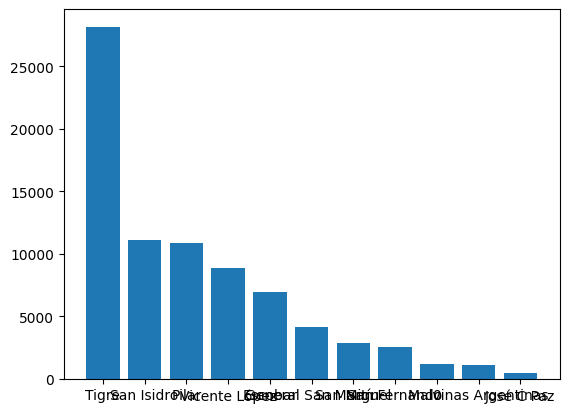

In [368]:

# Creamos el gráfico
plt.bar(CANTIDAD_BARRIO.index.astype(str), CANTIDAD_BARRIO.values)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Tigre'),
  Text(1, 0, 'San Isidro'),
  Text(2, 0, 'Pilar'),
  Text(3, 0, 'Vicente López'),
  Text(4, 0, 'Escobar'),
  Text(5, 0, 'General San Martín'),
  Text(6, 0, 'San Miguel'),
  Text(7, 0, 'San Fernando'),
  Text(8, 0, '0'),
  Text(9, 0, 'Malvinas Argentinas'),
  Text(10, 0, 'José C Paz')])

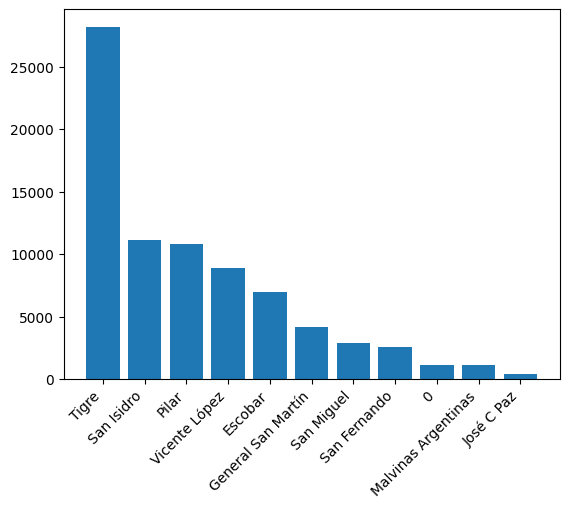

In [369]:
# Como quedan todos los nombres juntos voy a modificar el grado

plt.bar(CANTIDAD_BARRIO.index.astype(str), CANTIDAD_BARRIO.values)
plt.xticks(rotation=45, ha='right')

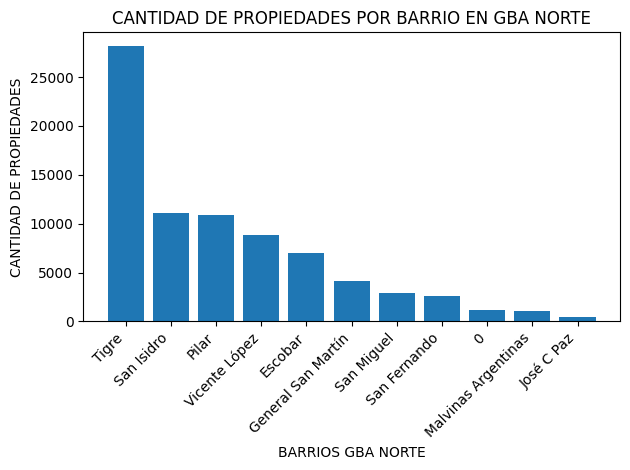

In [370]:
# Agregamos información al gráfico para brindar mayor detalle de la información que estamos mostrando.


plt.bar(CANTIDAD_BARRIO.index.astype(str), CANTIDAD_BARRIO.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('BARRIOS GBA NORTE')
plt.ylabel('CANTIDAD DE PROPIEDADES')
plt.title('CANTIDAD DE PROPIEDADES POR BARRIO EN GBA NORTE')
plt.tight_layout()
plt.show()


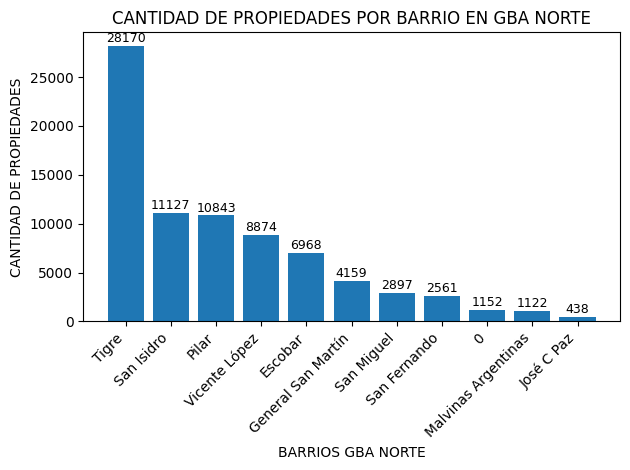

In [371]:
# Agrego las etiquetas a las series de datos

# 1) Defino el nombre del grafico

GRAFICO1= plt.bar(CANTIDAD_BARRIO.index.astype(str), CANTIDAD_BARRIO.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('BARRIOS GBA NORTE')
plt.ylabel('CANTIDAD DE PROPIEDADES')
plt.title('CANTIDAD DE PROPIEDADES POR BARRIO EN GBA NORTE')
plt.tight_layout()

# 2) Obtengo el valor de la barra (que cantidad por cada barrio)

for barra in GRAFICO1:
    altura = barra.get_height()

# 3) Mido el ancho de la barra (get_with), la posición horizontal de la barra (get_x) y coloco el texto (text: etiqueta)
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 100, str(altura),
             ha='center', va='bottom', fontsize=9)


EL PRIMER GRAFICO NOS BRINDA LA SIGUIENTE INFORMACIÓN: 
1) LOS PARTIDOS DE GBA ZONA NORTE QUE CONTIENE MI DATASET CON LA RESPECTIVA CANTIDAD DE PROPIEDADES DE CADA UNO. 
2) EL 35% DE LAS PROPIEDADES SE ENCUENTRAN EN EL PARTIDO DE TIGRE, POR LO QUE ES LA ZONA CON MAYOR CANTIDAD DE OFERTAS DE PROPIEDADES


GRAFICO 2

GRAFICO DE DISPERSIÓN

Lo vamos a utilizar para análizar la relación entre dos variables: Precio de la unidad y Superficie total. 
Con el gráfico tenemos como objetivo identificar relaciones, detectar patrones y evaluar la fuerza de la relación. 
Vamos solo a analizar los precios de venta por lo que deberemos generar un sub dataframe

In [372]:
# Generación de DF con tipo de operación "Venta"
# Verifico antes como está escrito
dff['operation_type'].value_counts()





operation_type
Venta                49570
Alquiler             23326
Alquiler temporal     5415
Name: count, dtype: int64

In [373]:
dff_ventas=dff[dff['operation_type']=='Venta']

In [374]:
# Verifico que la cantidad de filas coincida con el value_counts antes de efectuar el filtro
dff_ventas.shape

(49570, 18)

In [375]:
# Voy a quitar del análisis los barrios que son = '0'
dff_ventas=dff_ventas[dff_ventas['l3'] !=0]

In [382]:
#Voy a considerar solo los valores que estan en USD
dff_ventas_USD=[dff_ventas['currency'] == 'USD']

In [384]:
# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= dff_ventas_USD,
    x='surface_total',
    y='price',
    hue='l3',
    palette='tab10'
)

# Títulos y etiquetas
plt.title('Relación entre Superficie Total y Precio por Barrio')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio (USD)')

# Mostrar leyenda con los colores por barrio
plt.legend(title='l3', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Figure size 1000x600 with 0 Axes>

In [ ]:
dff_ventas_USD.describe()

,id,lat,lon,bathrooms,surface_total,surface_covered,price
count,48403.000000,48403.000000,48403.000000,48403.000000,48403.000000,48403.000000,4.840300e+04
mean,449879.694709,-44.421515,-26.092299,2.385217,435.244179,211.131810,3.598588e+05
std,285051.401275,25.146004,14.770205,1.276433,2515.145426,1461.974183,4.334742e+05
min,8.000000,-64.266611,-34.597054,1.000000,10.000000,1.000000,0.000000e+00
25%,197388.500000,-58.702416,-34.481851,1.000000,85.000000,70.000000,1.550000e+05
50%,431481.000000,-58.571419,-34.422633,2.000000,195.000000,140.000000,2.580000e+05
75%,671038.500000,-58.473979,-34.331767,3.000000,401.000000,225.000000,4.200000e+05
max,999987.000000,0.000000,0.000000,20.000000,169000.000000,235000.000000,1.810000e+07


In [ ]:
PRECIOMIN=dff_ventas_USD.price.min()
print (PRECIOMIN)

PRECIOMAX = dff_ventas_USD.price.max()
print(PRECIOMAX)

SUPMAX= dff_ventas_USD.surface_total.max()
print (SUPMAX)
SUPMIN= dff_ventas_USD.surface_total.min()
print (SUPMIN)


0.0
18100000.0
169000.0
10.0


ANÁLISIS

El gráfico de dispersión me presento los siguientes desafíos: 

1) Tuve que acotar mi análisis solo a operaciones de VENTA y a valores en USD dado que la variable precio no iba a ser comparable y me iba a distorsionar los puntos en el gráfico dado que iba a estar midiendo las propiedades en dos unidades de medida diferente. 
2) Los valores anómalos (outliers) me están dificultando la visualización y la identificación de patrones. 

Para ampliar el análisis de valores atípicos voy a utilizar otra herramienta: El gráfico de Caja (BOXPLOT)

GRAFICO 3

BOXPLOT

Esta herramienta gráfica me va a permitir visualizar la distribución de las variables de precio y superficie, facilitando la identificación de outliers.

Text(0.5, 0, 'Barrio')

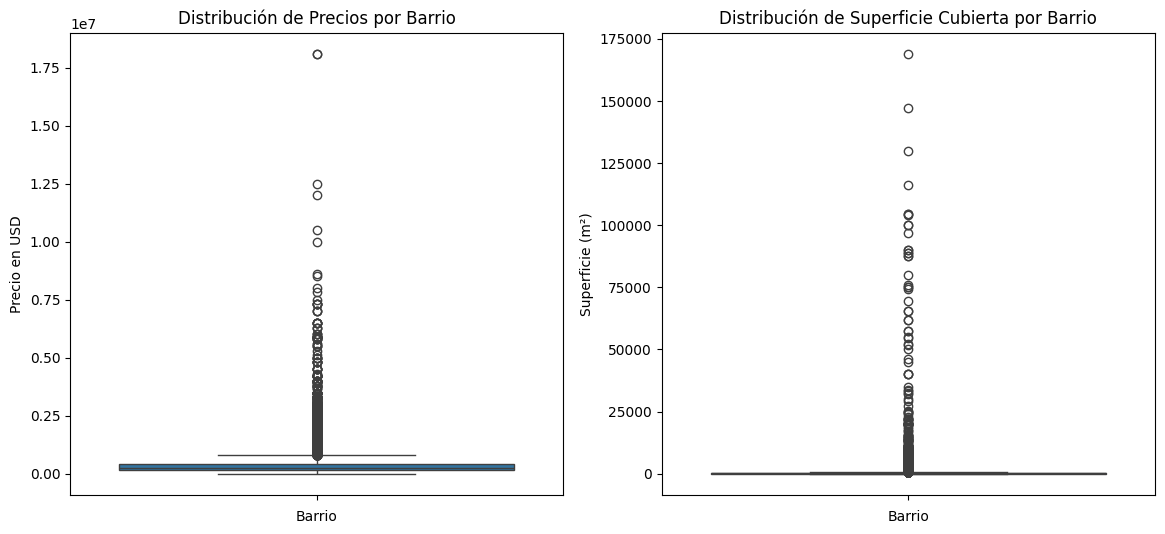

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

import seaborn as sns

sns.boxplot(data=dff_ventas_USD,y=dff_ventas_USD['price'],ax=axes[0])
axes[0].set_title('Distribución de Precios por Barrio')
axes[0].set_ylabel('Precio en USD')
axes[0].set_xlabel('Barrio')

sns.boxplot(data=dff_ventas_USD,y=dff_ventas_USD['surface_total'], ax=axes[1])
axes[1].set_title('Distribución de Superficie Cubierta por Barrio')
axes[1].set_ylabel('Superficie (m²)')
axes[1].set_xlabel('Barrio')


In [ ]:
dff_ventas_USD.describe().round(0).astype(int)

,id,lat,lon,bathrooms,surface_total,surface_covered,price
count,48403,48403,48403,48403,48403,48403,48403
mean,449880,-44,-26,2,435,211,359859
std,285051,25,15,1,2515,1462,433474
min,8,-64,-35,1,10,1,0
25%,197388,-59,-34,1,85,70,155000
50%,431481,-59,-34,2,195,140,258000
75%,671038,-58,-34,3,401,225,420000
max,999987,0,0,20,169000,235000,18100000


En el gráfico de caja veo que tengo outliers que están distorsionando mi análisis. 

Lo compruebo adicionalmente viendo los valores estadísticos a través de describe ()

El promedio de precio es de $359.859 y el rango intercuartil va de 155K a 420K. 

El Promedio de superficie es de 435 m2 y el rango intercuartil va de 85 a 401. 

Los valores máximos 18.100.000 en el precio y el valor de 169000 m2 en la superficie representan valores atípicos así como la superficie = 10m2 y el precio = a 0. 

Debemos tratarlos dado que están distorsionando nuestro análisis. 

In [ ]:
# Voy a utilizar el IQR (Rango Intercuartil)

#Calculo el 1ero y el 3ero

Q1P= dff_ventas_USD['price'].quantile(0.25)
Q3P=dff_ventas_USD['price'].quantile(0.75)

IQRP=Q3P-Q1P

# Defino los limites para identificar los outliers

lower_boundp= Q1P-1.5*IQRP
upper_boundp=Q3P + 1.5*IQRP



In [ ]:
# Filtrar outliers de precio

Outliersp= dff_ventas_USD[
    (dff_ventas_USD['price']  < lower_boundp)
     |(dff_ventas_USD['price']> upper_boundp)]

In [ ]:
print('Outliers Destacados')
print(Outliersp)

Outliers Destacados
            id    ad_type  start_date    end_date  created_on        lat  \
6233       600  Propiedad  2019-07-07  2019-07-09  2019-07-07   0.000000   
6275       643  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.509999   
6315       684  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.643184   
6326       695  Propiedad  2019-07-07  2019-07-07  2019-07-07   0.000000   
6363       732  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.472334   
...        ...        ...         ...         ...         ...        ...   
992170  999979  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992171  999980  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992173  999982  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992177  999986  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.485104   
992178  999987  Propiedad  2020-01-09  9999-12-31  2020-01-09 -58.489073   

              lon         l1                        l2             

In [ ]:
Outliersp.describe().round(0).astype(int)

,id,lat,lon,bathrooms,surface_total,surface_covered,price
count,3361,3361,3361,3361,3361,3361,3361
mean,468738,-40,-24,4,1266,775,1466436
std,285900,27,16,2,4299,3168,1009740
min,600,-59,-35,1,70,1,819900
25%,220948,-59,-34,3,450,358,950000
50%,468576,-59,-34,4,680,430,1200000
75%,694881,0,0,5,1124,559,1590000
max,999987,0,0,20,130000,104276,18100000


In [ ]:
# Ahora lo calculo para la superficie

#Calculo el 1ero y el 3ero

Q1S= dff_ventas_USD['surface_total'].quantile(0.25)
Q3S=dff_ventas_USD['surface_total'].quantile(0.75)

IQRS=Q3S-Q1S

# Defino los limites para identificar los outliers

lower_bounds= Q1S-1.5*IQRS
upper_bounds=Q3S + 1.5*IQRS

In [ ]:
# Filtrar outliers de superficie


Outlierss = dff_ventas_USD[
    (dff_ventas_USD['surface_total'] > upper_bounds) |
    (dff_ventas_USD['surface_total'] < lower_bounds)]


In [ ]:
print(Outlierss)

            id    ad_type  start_date    end_date  created_on        lat  \
6218       585  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.703700   
6220       587  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.579659   
6221       588  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.693529   
6223       590  Propiedad  2019-07-07  2019-07-09  2019-07-07 -58.686691   
6311       680  Propiedad  2019-07-07  2019-07-09  2019-07-07   0.000000   
...        ...        ...         ...         ...         ...        ...   
992168  999977  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.859391   
992170  999979  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992171  999980  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992173  999982  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.625235   
992177  999986  Propiedad  2020-01-09  2020-02-28  2020-01-09 -58.485104   

              lon         l1                        l2             l3  \
6218   -34.386

In [ ]:
Outlierss.describe().round(0).astype(int)

,id,lat,lon,bathrooms,surface_total,surface_covered,price
count,4232,4232,4232,4232,4232,4232,4232
mean,481781,-41,-24,3,2470,713,833481
std,286056,27,16,2,8207,3195,999134
min,585,-64,-35,1,876,1,0
25%,243495,-59,-34,2,977,207,299000
50%,481228,-59,-34,3,1100,308,500000
75%,693934,0,0,4,1500,459,990000
max,999986,0,0,17,169000,104276,18100000


Luego del análisis efectuado. Para el análisis de dispersión y análizar la relación entre las variables de precio y m2 de superficie total, vamos a quitar los outliers. 

In [ ]:

dff_sin_outliersp= dff_ventas_USD[ (dff_ventas_USD['price'] >= lower_boundp)
                                  & (dff_ventas_USD['price'] <= upper_boundp)]
                                  

In [ ]:
dff_sin_outliers.describe().round(0).astype(int)

,id,lat,lon,bathrooms,surface_total,surface_covered,price
count,42200,42200,42200,42200,42200,42200,42200
mean,446340,-45,-26,2,229,151,269546
std,284714,25,15,1,209,1177,161814
min,8,-59,-35,1,10,1,0
25%,193634,-59,-34,1,76,65,145000
50%,425634,-59,-34,2,160,120,235000
75%,662200,-58,-34,3,286,200,360000
max,999983,0,0,12,875,235000,815000


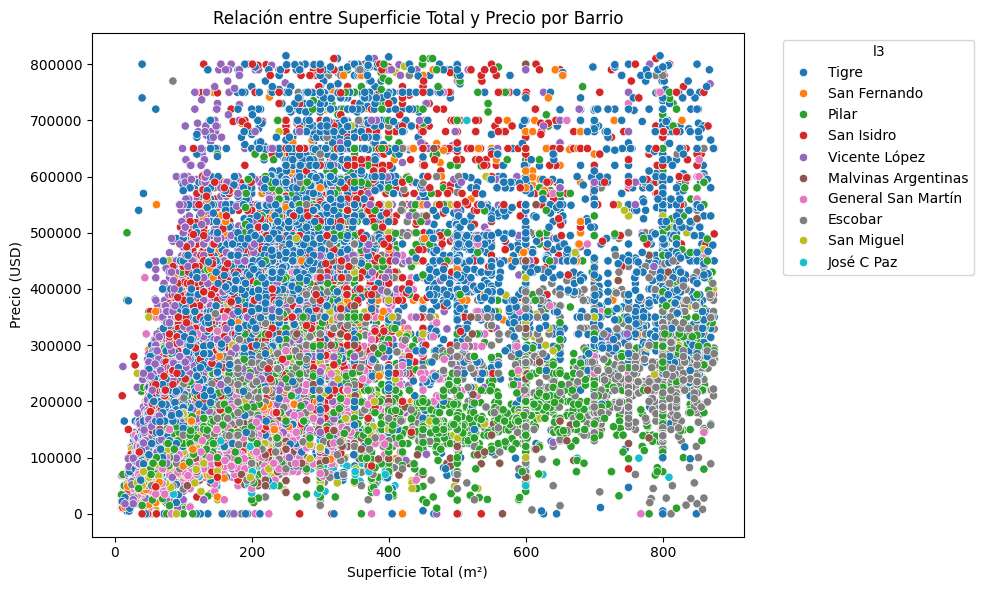

In [385]:

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= dff_sin_outliers,
    x='surface_total',
    y='price',
    hue='l3',
    palette='tab10'
)

# Títulos y etiquetas
plt.title('Relación entre Superficie Total y Precio por Barrio')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio (USD)')

# Mostrar leyenda con los colores por barrio
plt.legend(title='l3', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Si bien el gráfico con los colores me puede dar cierta información respecto a las zonas más y menos caras y las zonas con las propiedades mas o menos grandes vamos a realizar un análisis por barrio. 


In [395]:
barrios = dff_sin_outliers['l3'].unique()
num_barrios = len(barrios)


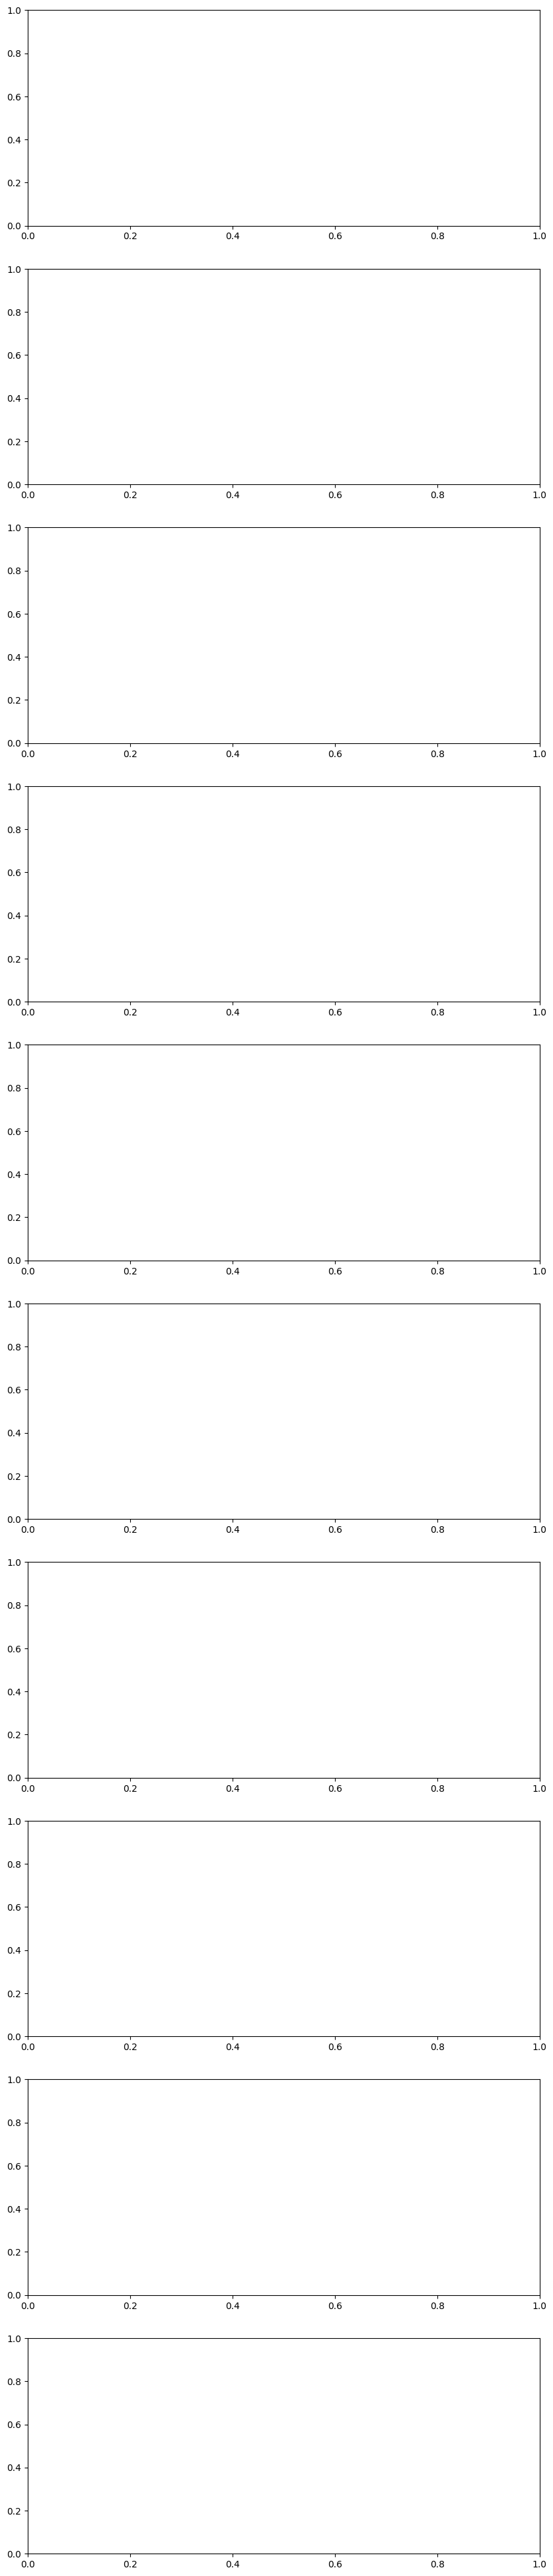

In [ ]:

fig, axes = plt.subplots(nrows=num_barrios, figsize=(10, 5 * num_barrios))

In [397]:

if num_barrios == 1:
    axes = [axes]


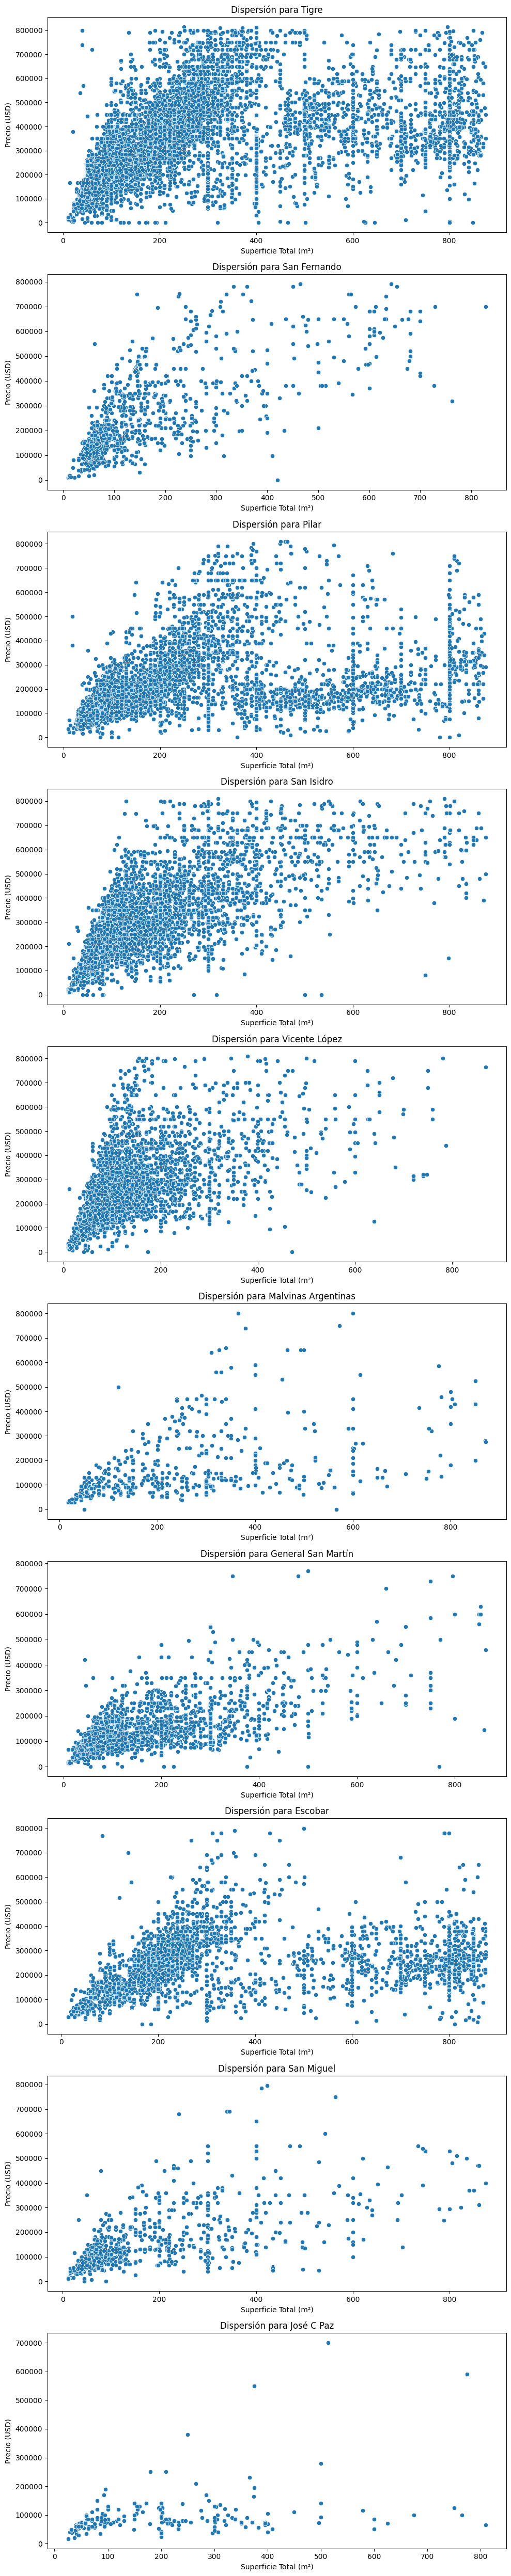

In [401]:
fig, axes = plt.subplots(nrows=num_barrios, figsize=(10, 5 * num_barrios))


for ax, barrio in zip(axes, barrios):
    subset = dff_sin_outliers[dff_sin_outliers['l3'] == barrio]
    sns.scatterplot(data=subset, x='surface_total', y='price', ax=ax)
    ax.set_title(f'Dispersión para {barrio}')
    ax.set_xlabel('Superficie Total (m²)')
    ax.set_ylabel('Precio (USD)')

plt.tight_layout()
plt.show()


Voy a revisar los tipos de propiedades que tengo en el dataset

In [406]:
dff_sin_outliers.value_counts('property_type')

property_type
Casa               22327
Departamento       15385
PH                  1718
Local comercial      910
Oficina              901
Otro                 351
Depósito             258
Lote                 202
Cochera              115
Casa de campo         33
Name: count, dtype: int64

Voy a acotar el análisis a las casas

In [415]:
dff_sin_outliers_casa=dff_sin_outliers[(dff_sin_outliers['property_type']=='Casa')]

In [417]:
dff_sin_outliers_casa.shape

(22327, 18)

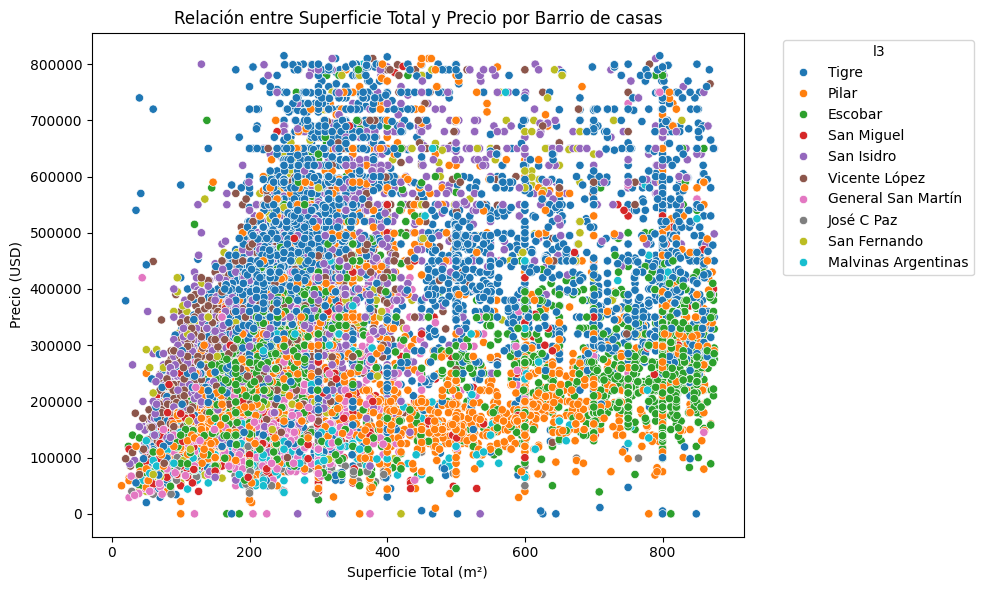

In [419]:

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data= dff_sin_outliers_casa,
    x='surface_total',
    y='price',
    hue='l3',
    palette='tab10'
)

# Títulos y etiquetas
plt.title('Relación entre Superficie Total y Precio por Barrio de casas')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio (USD)')

# Mostrar leyenda con los colores por barrio
plt.legend(title='l3', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

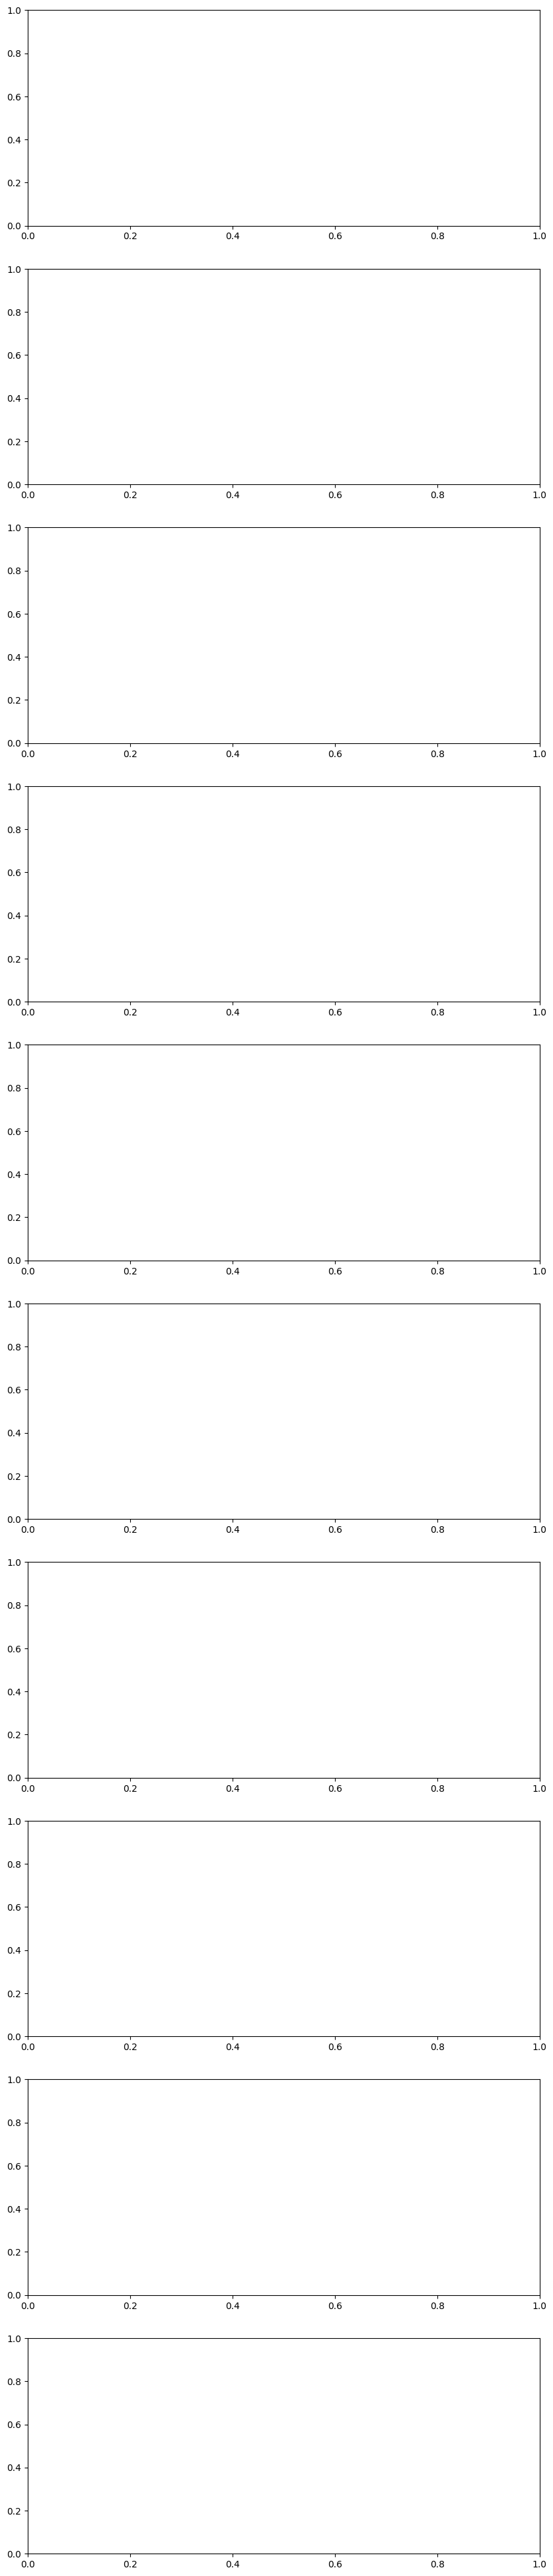

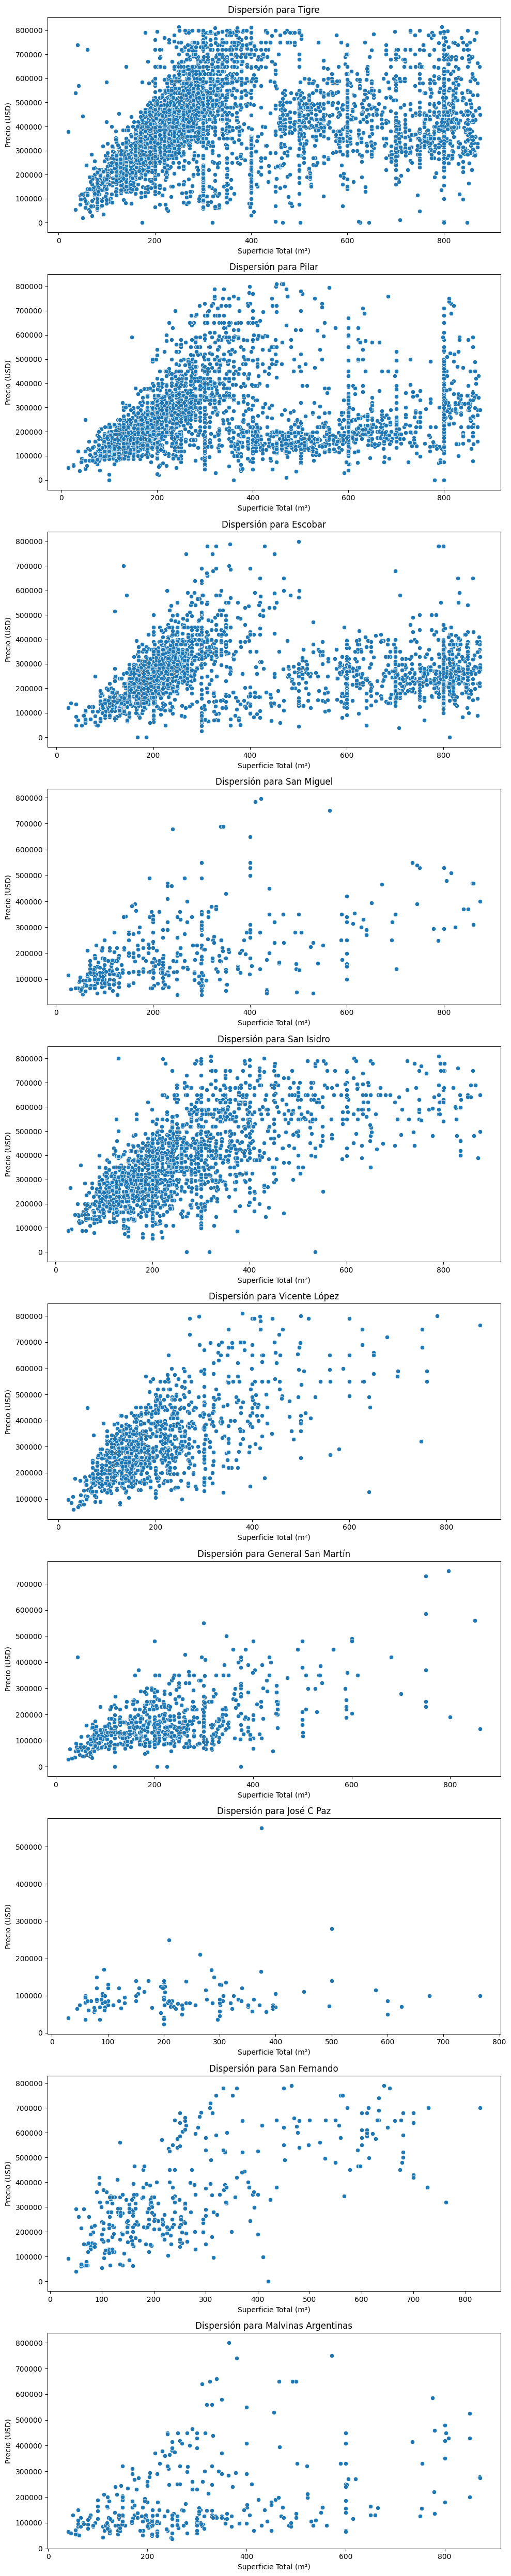

In [425]:
barrios_casa= dff_sin_outliers_casa['l3'].unique()
num_barrios = len(barrios_casa)


fig, axes = plt.subplots(nrows=num_barrios, figsize=(10, 5 * num_barrios))

if num_barrios == 1:
    axes = [axes]

fig, axes = plt.subplots(nrows=num_barrios, figsize=(10, 5 * num_barrios))


for ax, barrios_casa in zip(axes, barrios_casa):
    subset = dff_sin_outliers_casa [dff_sin_outliers_casa ['l3'] == barrios_casa]
    sns.scatterplot(data=subset, x='surface_total', y='price', ax=ax)
    ax.set_title(f'Dispersión para {barrios_casa}')
    ax.set_xlabel('Superficie Total (m²)')
    ax.set_ylabel('Precio (USD)')

plt.tight_layout()
plt.show()


Voy a calcular las estadisticas por partido para realizar una comparativa

In [ ]:
Estadisticas_Precio = dff_sin_outliers_casa.groupby('l3')['price'].agg(
    media='mean',
).reset_index()


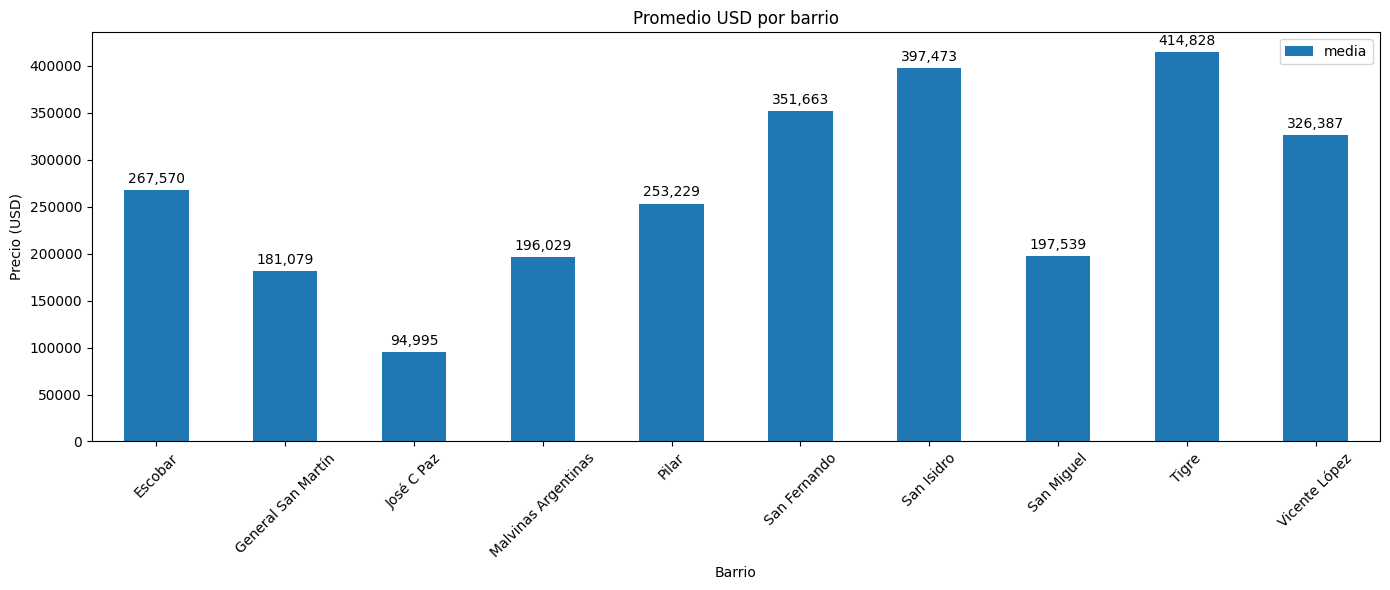

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por barrio y calculo el promedio de precio por barrio
Estadisticas_precio = dff_sin_outliers_casa.groupby('l3')['price'].agg(
    media='mean',
).reset_index()

# Crear gráfico de barras
ax = Estadisticas_precio.set_index('l3')[['media']].plot(kind='bar', figsize=(14, 6))
plt.title('Promedio USD por barrio')
plt.ylabel('Precio (USD)')
plt.xlabel('Barrio')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():,.0f}' for bar in container], label_type='edge', padding=3)

plt.show()




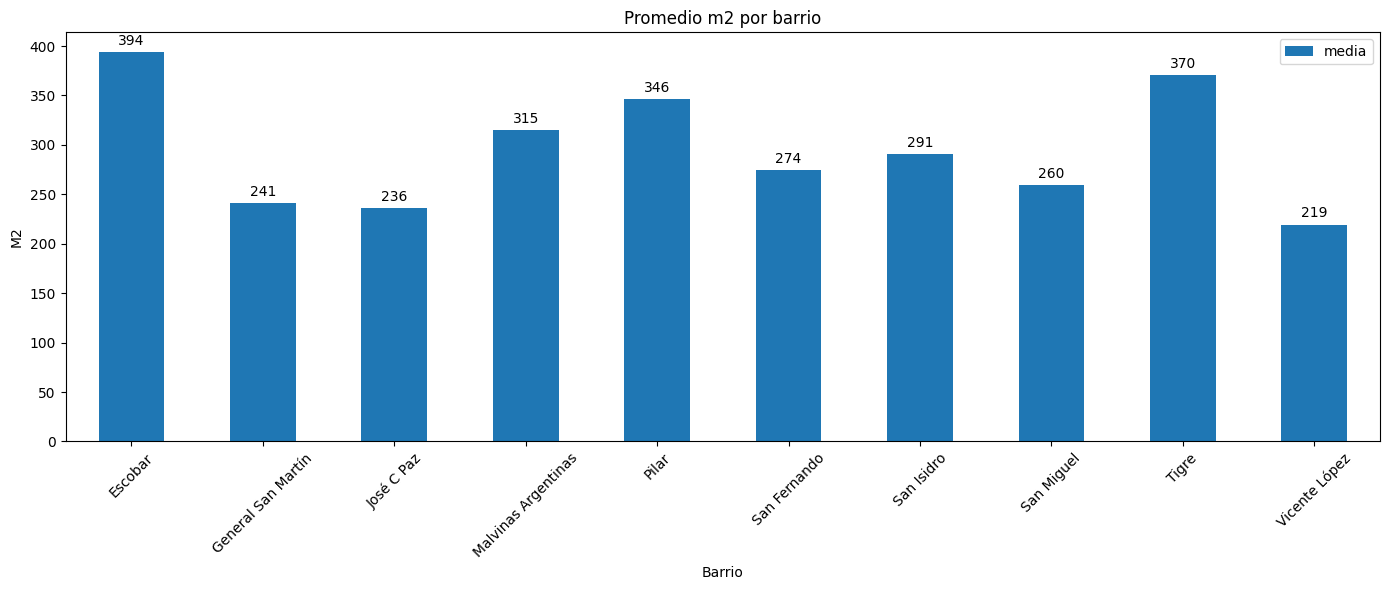

In [458]:

# Agrupar por barrio y calculo el promedio de m2 por barrio
Estadisticas_precio = dff_sin_outliers_casa.groupby('l3')['surface_total'].agg(
    media='mean',
).reset_index()

# Crear gráfico de barras
ax = Estadisticas_precio.set_index('l3')[['media']].plot(kind='bar', figsize=(14, 6))
plt.title('Promedio m2 por barrio')
plt.ylabel('M2')
plt.xlabel('Barrio')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():,.0f}' for bar in container], label_type='edge', padding=3)

plt.show()

La comparativa del promedio de $ y promedio de m2 por barrio nos brinda información para nuestra hipotésis de que San Isidro es el 2do partido mas caro de GBA NORTE pero el promedio de M2 se encuentra 5to. 

Para poder hacerlos comparativos vamos a crear una columna en  nuestro data frame donde calculemos el valor por m2

In [ ]:
dff_sin_outliers_casa['Precio por M2']= dff_sin_outliers_casa['price']/dff_sin_outliers_casa['surface_total']

C:\Users\afontan1\AppData\Local\Temp\ipykernel_16476\1768767889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_sin_outliers_casa['Precio por M2']= dff_sin_outliers_casa['price']/dff_sin_outliers_casa['surface_total']


In [461]:
dff_sin_outliers_casa.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,Precio por M2
5660,8,Propiedad,2019-07-07,9999-12-31,2019-07-07,-58.713329,-34.390757,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,286.0,262.0,USD,Mensual,Casa,Venta,545000.0,1905.594406
6072,428,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.679008,-34.447492,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,1.0,100.0,100.0,USD,0,Casa,Venta,140000.0,1400.000000
6209,576,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.891916,-34.417323,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,843.0,218.0,USD,0,Casa,Venta,315000.0,373.665480
6210,577,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.857216,-34.406290,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,630.0,167.0,USD,0,Casa,Venta,209000.0,331.746032
6212,579,Propiedad,2019-07-07,2019-07-09,2019-07-07,0.000000,0.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,800.0,150.0,USD,0,Casa,Venta,210000.0,262.500000


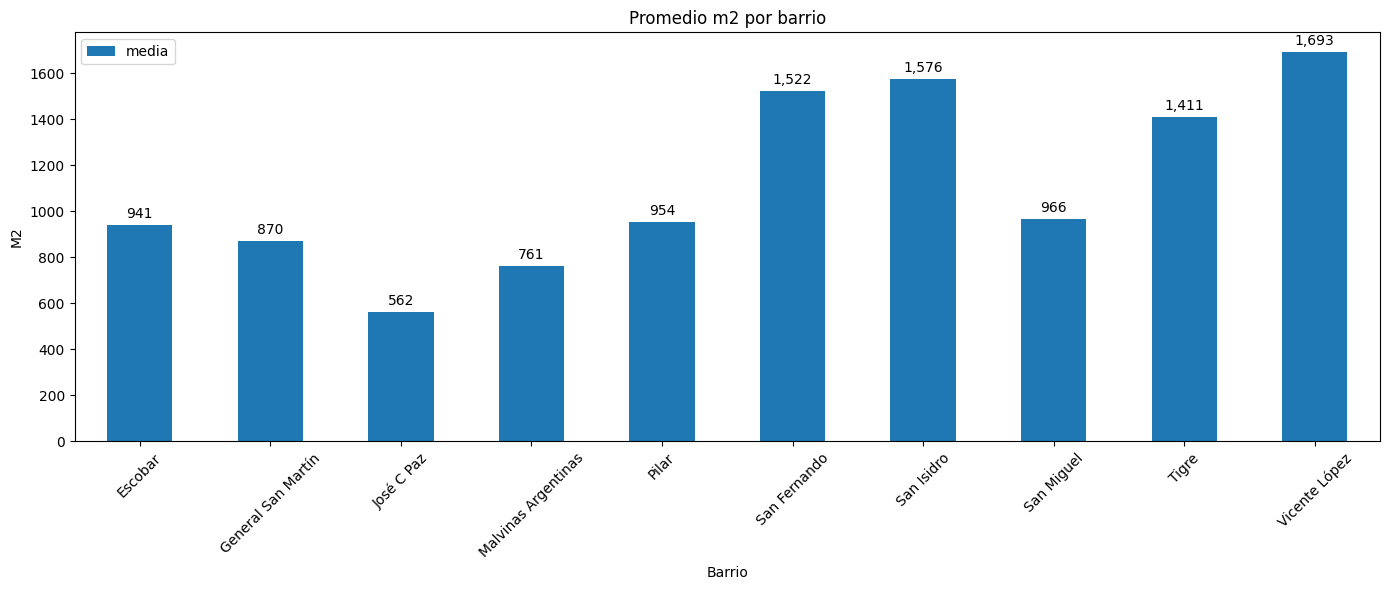

In [462]:
# Agrupar por barrio y calculo el promedio de m2 por barrio
Estadisticas_precio = dff_sin_outliers_casa.groupby('l3')['Precio por M2'].agg(
    media='mean',
).reset_index()

# Crear gráfico de barras
ax = Estadisticas_precio.set_index('l3')[['media']].plot(kind='bar', figsize=(14, 6))
plt.title('Promedio m2 por barrio')
plt.ylabel('M2')
plt.xlabel('Barrio')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():,.0f}' for bar in container], label_type='edge', padding=3)

El gráfico de barras promedio de m2 por barrio me brinda una información más significativa para mi análisis, comprobando que el partido de san isidro es el segundo partido con mayor valor el m2, pudiendo generar ahorros mudandome a una propiedad en otra zona o manteniendo el valor pero aumentando los m2

Para un análisis más profundo podría llegar a necesitar información que elimine al principio como l4, l5 que me brindaba información de la localidad y si se encontraba en un barrio privado. 

Analizaremos para la próxima entrega si reformulamos el trabajo y agregamos nuevamente esas columnas o no.